# Prediction of the Currents Month Forward Price Using LSTM Models

# Methodology
- always went back to the best performming multivariate_lstm so far and adjusted from there


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [3]:
from build_a_pipeline import build_pipeline_P0_foward_price
model_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P0')
datetime_index = x_val.index
#x_val = x_val.sort_index(ascending=True)
#y_val = y_val.sort_index(ascending=True)
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    
model_performance = [] 


## Multivariate LSTM multivariate_lstm 

- 200 Input Neurons on an Input Layer
- 2 Dense layers with 100 and 200 neurals
- relu function for activation

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(200, activation='relu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 22070.6699 - root_mean_squared_error: 147.5103 - val_loss: 9313.2939 - val_root_mean_squared_error: 96.5054
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6865.3662 - root_mean_squared_error: 82.3263 - val_loss: 2062.7659 - val_root_mean_squared_error: 45.4177
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2268.2112 - root_mean_squared_error: 47.5750 - val_loss: 408.9038 - val_root_mean_squared_error: 20.2214
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2022.3361 - root_mean_squared_error: 44.7912 - val_loss: 751.8026 - val_root_mean_squared_error: 27.4190
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2046.5856 - root_mean_squared_error: 44.6258 - val_loss: 789.4386 - val_root_mean_squared_error: 28.0970
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2309.3198 - root_mean_squared_error: 47.8755 - val_loss: 1578.4031 - val_root_mean_squared_error: 39.7291
Epoch 7

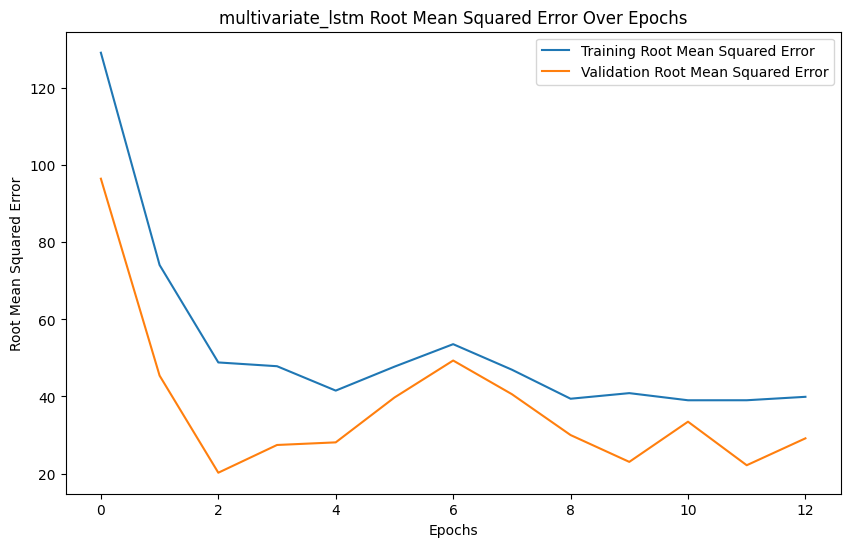

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('multivariate_lstm Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

## Multivariate LSTM 
- 300 neurons activation layer
- 3 activation layers

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(300, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(200, activation='relu'),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 20865.6348 - root_mean_squared_error: 143.0586 - val_loss: 12830.7471 - val_root_mean_squared_error: 113.2729
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5429.0225 - root_mean_squared_error: 72.4143 - val_loss: 1257.1322 - val_root_mean_squared_error: 35.4561
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3806.1663 - root_mean_squared_error: 61.5581 - val_loss: 919.4072 - val_root_mean_squared_error: 30.3217
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3695.4219 - root_mean_squared_error: 60.4917 - val_loss: 1159.2450 - val_root_mean_squared_error: 34.0477
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3442.8425 - root_mean_squared_error: 58.0379 - val_loss: 928.0703 - val_root_mean_squared_error: 30.4642
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2605.2473 - root_mean_squared_error: 50.7552 - val_loss: 439.9749 - val_root_mean_squared_error: 20.9756
Epo

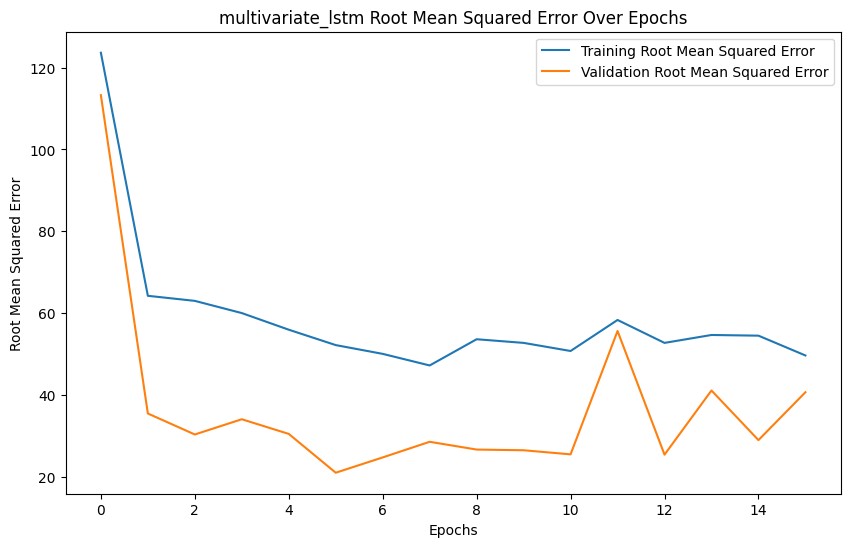

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('multivariate_lstm Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

This proved to have worse performence, then the previous multivariate_lstm

## Multivariate LSTM - Simplified
- 200 neurons input layer
- 1 Dense Layer

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 24467.6074 - root_mean_squared_error: 155.9355 - val_loss: 32030.9961 - val_root_mean_squared_error: 178.9721
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16692.5195 - root_mean_squared_error: 128.3867 - val_loss: 18463.2480 - val_root_mean_squared_error: 135.8795
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10084.7256 - root_mean_squared_error: 100.0463 - val_loss: 12509.1895 - val_root_mean_squared_error: 111.8445
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6115.8242 - root_mean_squared_error: 77.7066 - val_loss: 5254.0225 - val_root_mean_squared_error: 72.4846
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3239.4102 - root_mean_squared_error: 56.4924 - val_loss: 1281.7502 - val_root_mean_squared_error: 35.8015
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1616.3440 - root_mean_squared_error: 40.0303 - val_loss: 1036.5945 - val_root_mean_squared_error: 32.1962
Epoch

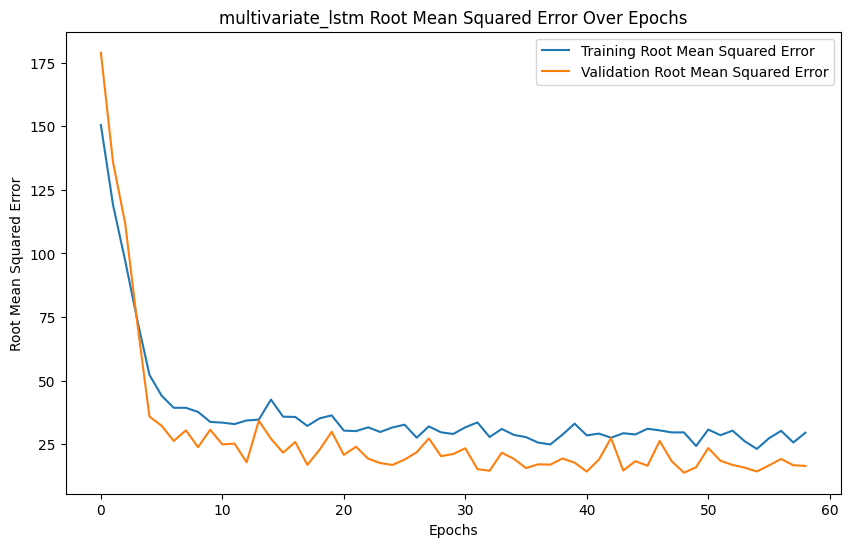

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('multivariate_lstm Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

Looks like simpler multivariate_lstm performed the best, therefore going this direction

## LSTM
- 300 input layers, 0.6 Dropout
- 200 dense layers, 0.5 Dropout
- keeping it only 3 layers, but increase amount of neurons

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(300, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.6),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 24029.5234 - root_mean_squared_error: 154.4593 - val_loss: 25706.8848 - val_root_mean_squared_error: 160.3337
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13098.5469 - root_mean_squared_error: 113.6098 - val_loss: 12904.2920 - val_root_mean_squared_error: 113.5971
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6705.6392 - root_mean_squared_error: 81.5623 - val_loss: 5407.4180 - val_root_mean_squared_error: 73.5351
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3124.1084 - root_mean_squared_error: 55.4615 - val_loss: 1653.4545 - val_root_mean_squared_error: 40.6627
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2141.4907 - root_mean_squared_error: 46.1664 - val_loss: 1309.8923 - val_root_mean_squared_error: 36.1924
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1811.7710 - root_mean_squared_error: 42.2162 - val_loss: 1117.3331 - val_root_mean_squared_error: 33.4265
Epoch 7/

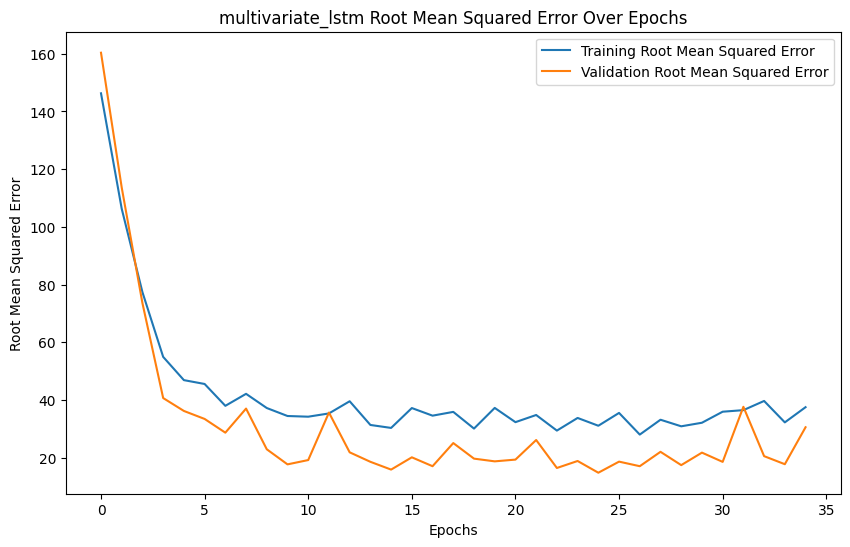

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('multivariate_lstm Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

LSTM multivariate_lstm
- 3 layers, changing the activation function to selu

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='selu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 23556.2910 - root_mean_squared_error: 152.8610 - val_loss: 24981.4121 - val_root_mean_squared_error: 158.0551
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12276.3652 - root_mean_squared_error: 109.8343 - val_loss: 12261.1045 - val_root_mean_squared_error: 110.7299
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6867.3506 - root_mean_squared_error: 82.1509 - val_loss: 3868.8630 - val_root_mean_squared_error: 62.2002
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2524.7983 - root_mean_squared_error: 50.0847 - val_loss: 791.5032 - val_root_mean_squared_error: 28.1337
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1417.9819 - root_mean_squared_error: 37.5768 - val_loss: 546.8929 - val_root_mean_squared_error: 23.3857
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1527.2670 - root_mean_squared_error: 39.0198 - val_loss: 389.6793 - val_root_mean_squared_error: 19.7403
Epoch 7/120

## Adding One More Layer, trying selu and relu together

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM multivariate_lstm
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Dense(200, activation = 'relu'),
    Dropout(0.6),
    Flatten(),
    Dense(100, activation='selu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 21315.9785 - root_mean_squared_error: 144.7891 - val_loss: 11582.7080 - val_root_mean_squared_error: 107.6230
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7901.3218 - root_mean_squared_error: 88.5147 - val_loss: 2168.4473 - val_root_mean_squared_error: 46.5666
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2242.1941 - root_mean_squared_error: 47.2353 - val_loss: 2277.2151 - val_root_mean_squared_error: 47.7202
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 2356.7271 - root_mean_squared_error: 48.3240 - val_loss: 1927.4745 - val_root_mean_squared_error: 43.9030
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2329.4807 - root_mean_squared_error: 47.7038 - val_loss: 559.7922 - val_root_mean_squared_error: 23.6599
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1762.3330 - root_mean_squared_error: 41.5956 - val_loss: 659.7955 - val_root_mean_squared_error: 25.6865
Ep

## TimeDistributed Layer Expiriment
- selu function

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'multivariate_lstm': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dense, Relu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 23335.9512 - root_mean_squared_error: 152.0929 - val_loss: 22498.6426 - val_root_mean_squared_error: 149.9955
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10943.1787 - root_mean_squared_error: 103.6984 - val_loss: 9466.9277 - val_root_mean_squared_error: 97.2981
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4477.1196 - root_mean_squared_error: 66.2473 - val_loss: 2014.9580 - val_root_mean_squared_error: 44.8883
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1299.3141 - root_mean_squared_error: 35.9678 - val_loss: 470.8758 - val_root_mean_squared_error: 21.6997
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 785.5764 - root_mean_squared_error: 27.8520 - val_loss: 466.7998 - val_root_mean_squared_error: 21.6056
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 610.5317 - root_mean_squared_error: 24.5806 - val_loss: 390.8322 - val_root_mean_squared_error: 19.7695
Epoch 7/120
18/

## TimeDistributed
- relu function

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 24114.9492 - root_mean_squared_error: 154.7570 - val_loss: 28102.0273 - val_root_mean_squared_error: 167.6366
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14994.0713 - root_mean_squared_error: 121.5847 - val_loss: 15496.1357 - val_root_mean_squared_error: 124.4835
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8219.0039 - root_mean_squared_error: 90.1234 - val_loss: 7909.7949 - val_root_mean_squared_error: 88.9370
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4030.0852 - root_mean_squared_error: 63.0214 - val_loss: 2304.4612 - val_root_mean_squared_error: 48.0048
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1637.1786 - root_mean_squared_error: 40.3079 - val_loss: 898.4746 - val_root_mean_squared_error: 29.9746
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 958.2105 - root_mean_squared_error: 30.7330 - val_loss: 521.5245 - val_root_mean_squared_error: 22.836

## Time Distributed Layers - 2
- 2 layers, relu and selu

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - loss: 21991.6621 - root_mean_squared_error: 147.3031 - val_loss: 13689.9141 - val_root_mean_squared_error: 117.0039
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9478.9346 - root_mean_squared_error: 96.7110 - val_loss: 4343.7764 - val_root_mean_squared_error: 65.9073
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3208.2864 - root_mean_squared_error: 56.4139 - val_loss: 1062.2987 - val_root_mean_squared_error: 32.5929
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1529.6498 - root_mean_squared_error: 39.0080 - val_loss: 500.2081 - val_root_mean_squared_error: 22.3653
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1537.1576 - root_mean_squared_error: 39.0476 - val_loss: 834.9428 - val_root_mean_squared_error: 28.8954
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1569.8119 - root_mean_squared_error: 39.3693 - val_loss: 622.0184 - val_root_mean_squared_error: 24.9403
Ep

More layers did not seem to improve the performance

## Timedistributed, 4 layers

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(200, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(50, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 19794.4355 - root_mean_squared_error: 139.0487 - val_loss: 7718.9321 - val_root_mean_squared_error: 87.8575
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3909.2195 - root_mean_squared_error: 62.3212 - val_loss: 727.6431 - val_root_mean_squared_error: 26.9749
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2205.2080 - root_mean_squared_error: 46.8258 - val_loss: 1235.4496 - val_root_mean_squared_error: 35.1490
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1939.7023 - root_mean_squared_error: 43.7337 - val_loss: 400.4861 - val_root_mean_squared_error: 20.0121
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1950.6768 - root_mean_squared_error: 43.7721 - val_loss: 405.3711 - val_root_mean_squared_error: 20.1338
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2216.1638 - root_mean_squared_error: 46.7737 - val_loss: 540.1816 - val_root_mean_squared_error: 23.2418
Epoch 7

Adding extra layers did not seem to improve performance

## NO LSTM, Time Distributed layers only

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(200, activation='relu'),
                    input_shape=(x_train.shape[1], x_train.shape[2]),),
    TimeDistributed(Dense(200, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(50, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 17359.8105 - root_mean_squared_error: 129.4260 - val_loss: 2039.0480 - val_root_mean_squared_error: 45.1558
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3571.4556 - root_mean_squared_error: 58.9815 - val_loss: 320.7179 - val_root_mean_squared_error: 17.9086
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4370.5229 - root_mean_squared_error: 65.9455 - val_loss: 1110.9883 - val_root_mean_squared_error: 33.3315
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3171.9268 - root_mean_squared_error: 55.7159 - val_loss: 1206.7626 - val_root_mean_squared_error: 34.7385
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2500.8938 - root_mean_squared_error: 49.6096 - val_loss: 495.9933 - val_root_mean_squared_error: 22.2709
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2223.6682 - root_mean_squared_error: 46.1938 - val_loss: 240.3901 - val_root_mean_squared_error: 15.5045
Epoch 7/120
18/18 ━

Time Distributed MLP
- inspired by https://www.kaggle.com/code/dimitriosroussis/electricity-price-forecasting-with-dnns-eda

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(200, activation='relu'),
                    input_shape=(x_train.shape[1], x_train.shape[2]),),
    TimeDistributed(Dense(150, activation='relu')), 
    TimeDistributed(Dense(100, activation='relu')), 
    TimeDistributed(Dense(50, activation='relu')), 
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=2e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 23121.0977 - root_mean_squared_error: 151.2830 - val_loss: 10750.5684 - val_root_mean_squared_error: 103.6849
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8124.0781 - root_mean_squared_error: 89.8744 - val_loss: 3123.7712 - val_root_mean_squared_error: 55.8907
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3207.4343 - root_mean_squared_error: 56.5496 - val_loss: 1456.7319 - val_root_mean_squared_error: 38.1672
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2089.8770 - root_mean_squared_error: 45.0552 - val_loss: 577.2329 - val_root_mean_squared_error: 24.0257
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1254.1995 - root_mean_squared_error: 34.9025 - val_loss: 256.7433 - val_root_mean_squared_error: 16.0232
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1266.3538 - root_mean_squared_error: 34.6552 - val_loss: 288.8704 - val_root_mean_squared_error: 16.9962
Epoch 

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(500, activation='relu'),
                    input_shape=(x_train.shape[1], x_train.shape[2]),),
    TimeDistributed(Dense(400, activation='relu')), 
    TimeDistributed(Dense(300, activation='relu')), 
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best multivariate_lstm based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=2e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 19571.4043 - root_mean_squared_error: 137.9886 - val_loss: 7681.7334 - val_root_mean_squared_error: 87.6455
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3630.6829 - root_mean_squared_error: 59.8166 - val_loss: 919.2023 - val_root_mean_squared_error: 30.3183
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2139.4009 - root_mean_squared_error: 44.9985 - val_loss: 690.6476 - val_root_mean_squared_error: 26.2802
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1783.4771 - root_mean_squared_error: 41.2249 - val_loss: 409.9900 - val_root_mean_squared_error: 20.2482
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1902.9902 - root_mean_squared_error: 43.2017 - val_loss: 280.5211 - val_root_mean_squared_error: 16.7488
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1806.9816 - root_mean_squared_error: 42.2601 - val_loss: 336.7996 - val_root_mean_squared_error: 18.3521
Epoch 7/

Back to simple LSTM

## LSTM multivariate_lstm 
- simple again

In [21]:
input_shape = (x_train.shape[1], x_train.shape[2])

In [22]:
import tensorflow as tf

# Resetting the backend
tf.keras.backend.clear_session()

# Define multivariate_lstm
input_shape = (x_train.shape[1], x_train.shape[2])  # Ensure input_shape matches data
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(500, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 22067.2246 - root_mean_squared_error: 147.5643 - val_loss: 13163.9902 - val_root_mean_squared_error: 114.7344
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7844.6929 - root_mean_squared_error: 88.2094 - val_loss: 4254.7344 - val_root_mean_squared_error: 65.2283
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2290.3135 - root_mean_squared_error: 47.6860 - val_loss: 770.3679 - val_root_mean_squared_error: 27.7555
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1274.9902 - root_mean_squared_error: 35.5957 - val_loss: 572.1336 - val_root_mean_squared_error: 23.9193
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1071.3362 - root_mean_squared_error: 32.5905 - val_loss: 514.2775 - val_root_mean_squared_error: 22.6777
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1029.6500 - root_mean_squared_error: 31.8655 - val_loss: 891.1482 - val_root_mean_squared_error: 29.8521
Epoc

## LSTM - increase the amount of neurons

In [23]:
import tensorflow as tf

# Resetting the backend
tf.keras.backend.clear_session()

# Define multivariate_lstm
input_shape = (x_train.shape[1], x_train.shape[2])  # Ensure input_shape matches data
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(500, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 17400.6758 - root_mean_squared_error: 129.0164 - val_loss: 1576.8666 - val_root_mean_squared_error: 39.7098
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2843.9578 - root_mean_squared_error: 53.1560 - val_loss: 616.3936 - val_root_mean_squared_error: 24.8273
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2002.4921 - root_mean_squared_error: 44.6215 - val_loss: 411.3982 - val_root_mean_squared_error: 20.2830
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1493.9874 - root_mean_squared_error: 38.4985 - val_loss: 786.1490 - val_root_mean_squared_error: 28.0383
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2151.7405 - root_mean_squared_error: 45.8658 - val_loss: 914.2474 - val_root_mean_squared_error: 30.2365
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1795.4436 - root_mean_squared_error: 41.7841 - val_loss: 607.1790 - val_root_mean_squared_error: 24.6410
Epoch 7

## 2 LSTM Layers

In [24]:
import tensorflow as tf

# Resetting the backend
tf.keras.backend.clear_session()

# Define multivariate_lstm
input_shape = (x_train.shape[1], x_train.shape[2])  # Ensure input_shape matches data
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(500, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=False),  # Second LSTM
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'multivariate_lstm': multivariate_lstm,
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 18620.4766 - root_mean_squared_error: 134.1769 - val_loss: 2746.8381 - val_root_mean_squared_error: 52.4103
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3854.9309 - root_mean_squared_error: 62.0099 - val_loss: 928.5280 - val_root_mean_squared_error: 30.4718
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1849.7994 - root_mean_squared_error: 42.9532 - val_loss: 477.3821 - val_root_mean_squared_error: 21.8491
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1334.3455 - root_mean_squared_error: 36.4875 - val_loss: 1332.2119 - val_root_mean_squared_error: 36.4995
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1612.8438 - root_mean_squared_error: 39.8841 - val_loss: 1461.0004 - val_root_mean_squared_error: 38.2230
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1593.9197 - root_mean_squared_error: 39.3991 - val_loss: 685.2179 - val_root_mean_squared_error: 26.1767
Epoch

In [25]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


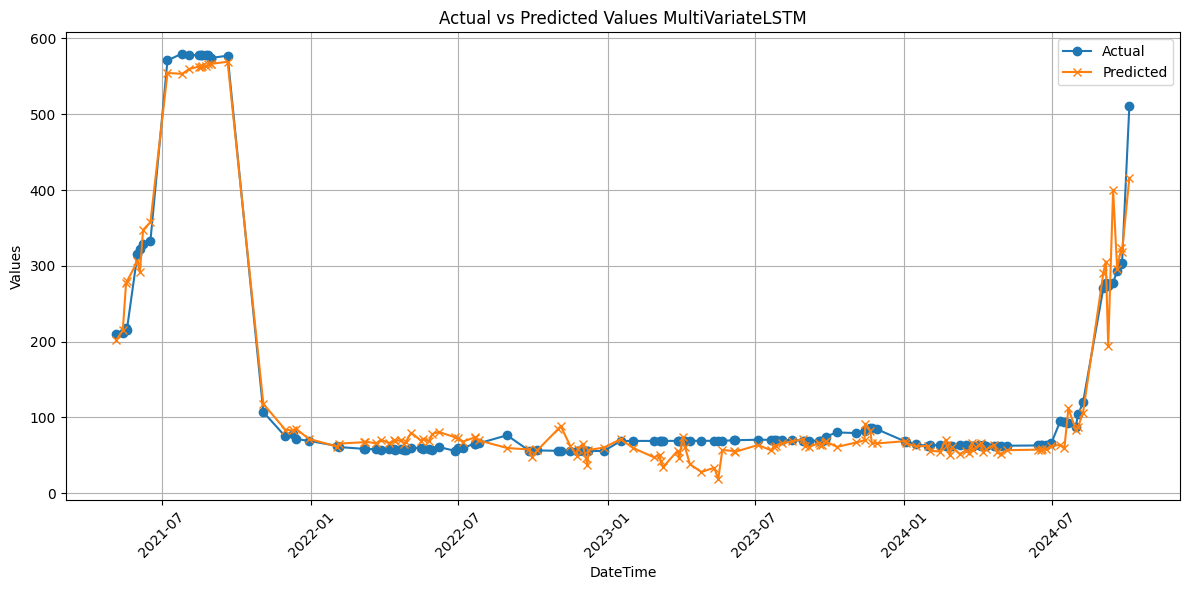

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
predictions_df = predictions_df.sort_index()
y_val = y_val.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val, label='Actual', marker='o')
plt.plot(y_val.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
performance_df = pd.DataFrame(model_performance)
performance_df_sorted = performance_df.sort_values(by='Validation RMSE', ascending=True)
performance_df_sorted

,multivariate_lstm,Train RMSE,Validation RMSE,LayerExtra
6,LSTM - 200 input,3.749851,8.290479,"TimeDistributed, Dense, Relu"
7,"<Sequential name=sequential_7, built=True>",4.251611,10.392248,NaN
8,"<Sequential name=sequential_8, built=True>",23.064003,12.969560,NaN
4,"<Sequential name=sequential_4, built=True>",25.381016,15.256770,NaN
2,"<Sequential name=sequential_2, built=True>",29.472746,16.383909,NaN
5,"<Sequential name=sequential_5, built=True>",35.901695,17.884422,NaN
9,"<Sequential name=sequential_9, built=True>",45.515701,19.744005,NaN
14,"<Sequential name=sequential, built=True>",32.678692,23.820322,NaN
13,"<Sequential name=sequential, built=True>",27.724005,25.549633,NaN
15,"<Sequential name=sequential, built=True>",37.863247,25.967249,NaN
